In [1]:
from pycaret.classification import *

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("../MACH_data/cut_off_by_18avg.csv")
df.tail()

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
44346,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,1.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
44347,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,4.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
44348,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
44349,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
44350,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Agnostic,Heterosexual,White,No,Never married,3,69.0,34.0,27.0,8.0


In [4]:
df.shape

(44351, 108)

In [5]:
df.columns[40:]

Index(['Q14I', 'Q14E_ppl_brave', 'Q15_TP_abu_good', 'Q15I', 'Q15E_abu_good',
       'Q16_TN_ppl_good', 'Q16I', 'Q16E_ppl_good', 'Q17_VN_ppl_notbad', 'Q17I',
       'Q17E_ppl_notbad', 'Q18_VP_komsu_better', 'Q18I', 'Q18E_komsu_better',
       'Q19_MP_anrocksa_ok', 'Q19I', 'Q19E_anrocksa_ok', 'Q20_VP_money_good',
       'Q20I', 'Q20E_money_good', 'country', 'introelapse', 'testelapse',
       'surveyelapse', 'TYP_out', 'TYP_fight', 'TYP_depnd', 'TYP_anx',
       'TYP_try', 'TYP_quiet', 'TYP_warm', 'TYP_disorg', 'TYP_calm',
       'TYP_stable', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6_F', 'VCL7',
       'VCL8', 'VCL9_F', 'VCL10', 'VCL11', 'VCL12_F', 'VCL13', 'VCL14',
       'VCL15', 'VCL16', 'education', 'urban', 'gender', 'engnat', 'age',
       'screenw', 'screenh', 'hand', 'religion', 'orientation', 'race',
       'voted', 'married', 'familysize', 'score', 'v_score', 't_score',
       'm_score'],
      dtype='object')

In [6]:
id_cols = ['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize', 'country']

In [7]:
df_id = df[id_cols]
df_id.tail()

,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize,country
44346,University degree,Urban,Male,Yes,19,Right,Agnostic,Homosexual,White,Yes,Never married,3,CA
44347,University degree,Urban,Male,Yes,22,Right,Other,Heterosexual,Asian,No,Never married,1,IE
44348,Graduate degree,Urban,Male,No,29,Right,Other,Heterosexual,Asian,No,Currently married,1,US
44349,High school,Suburban,Female,No,20,Right,Atheist,Homosexual,White,No,Never married,2,PL
44350,High school,Urban,Male,No,31,Right,Agnostic,Heterosexual,White,No,Never married,3,RO


In [8]:
clf = setup(data = df_id, target = 'voted', normalize=True, normalize_method='minmax')

Setup Succesfully Completed!


,Description,Value
0,session_id,6182
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(44351, 13)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.6558,0.7125,0.7496,0.6494,0.6959,0.3040,0.3083,9.1489
1,Light Gradient Boosting Machine,0.6531,0.7121,0.7401,0.6490,0.6915,0.2991,0.3026,0.3287
2,Extreme Gradient Boosting,0.6489,0.7068,0.7384,0.6449,0.6885,0.2905,0.2940,21.9838
3,Gradient Boosting Classifier,0.6445,0.7018,0.7704,0.6329,0.6948,0.2786,0.2865,6.1387
4,Ada Boost Classifier,0.6436,0.6974,0.7657,0.6330,0.6930,0.2773,0.2846,2.3976
5,Linear Discriminant Analysis,0.6381,0.6856,0.6979,0.6435,0.6696,0.2711,0.2722,0.6668
6,Logistic Regression,0.6377,0.6848,0.6947,0.6438,0.6682,0.2703,0.2714,0.6313
7,Random Forest Classifier,0.6046,0.6461,0.5919,0.6322,0.6114,0.2099,0.2104,0.2308
8,Extra Trees Classifier,0.5998,0.6323,0.6188,0.6193,0.6190,0.1976,0.1977,1.8342
9,K Neighbors Classifier,0.5994,0.6285,0.6648,0.6089,0.6355,0.1927,0.1937,1.1916


#### model

In [10]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6477,0.7005,0.7776,0.6345,0.6988,0.2848,0.2934
1,0.6470,0.7056,0.7714,0.6352,0.6967,0.2839,0.2916
2,0.6428,0.6995,0.7537,0.6350,0.6893,0.2765,0.2821
3,0.6441,0.7069,0.7823,0.6298,0.6978,0.2771,0.2868
4,0.6364,0.7003,0.7787,0.6232,0.6923,0.2611,0.2709
5,0.6495,0.7148,0.7664,0.6387,0.6968,0.2895,0.2963
6,0.6411,0.6849,0.7541,0.6330,0.6883,0.2729,0.2787
7,0.6459,0.7112,0.7842,0.6313,0.6995,0.2807,0.2906
8,0.6463,0.7002,0.7738,0.6339,0.6969,0.2822,0.2903
9,0.6437,0.6945,0.7615,0.6340,0.6919,0.2777,0.2843


In [11]:
gbc_df = pull()

In [12]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6403,0.7023,0.7145,0.6417,0.6761,0.2742,0.2762
1,0.6593,0.7150,0.7531,0.6523,0.6991,0.3110,0.3153
2,0.6593,0.7126,0.7316,0.6582,0.6930,0.3126,0.3148
3,0.6573,0.7193,0.7597,0.6484,0.6996,0.3066,0.3118
4,0.6454,0.7085,0.7382,0.6411,0.6862,0.2832,0.2870
5,0.6675,0.7271,0.7554,0.6606,0.7048,0.3282,0.3320
6,0.6414,0.6934,0.7339,0.6381,0.6826,0.2752,0.2787
7,0.6582,0.7205,0.7486,0.6522,0.6971,0.3091,0.3130
8,0.6598,0.7111,0.7498,0.6537,0.6985,0.3124,0.3163
9,0.6424,0.7112,0.7161,0.6435,0.6779,0.2786,0.2806


In [13]:
lgbm_df = pull()

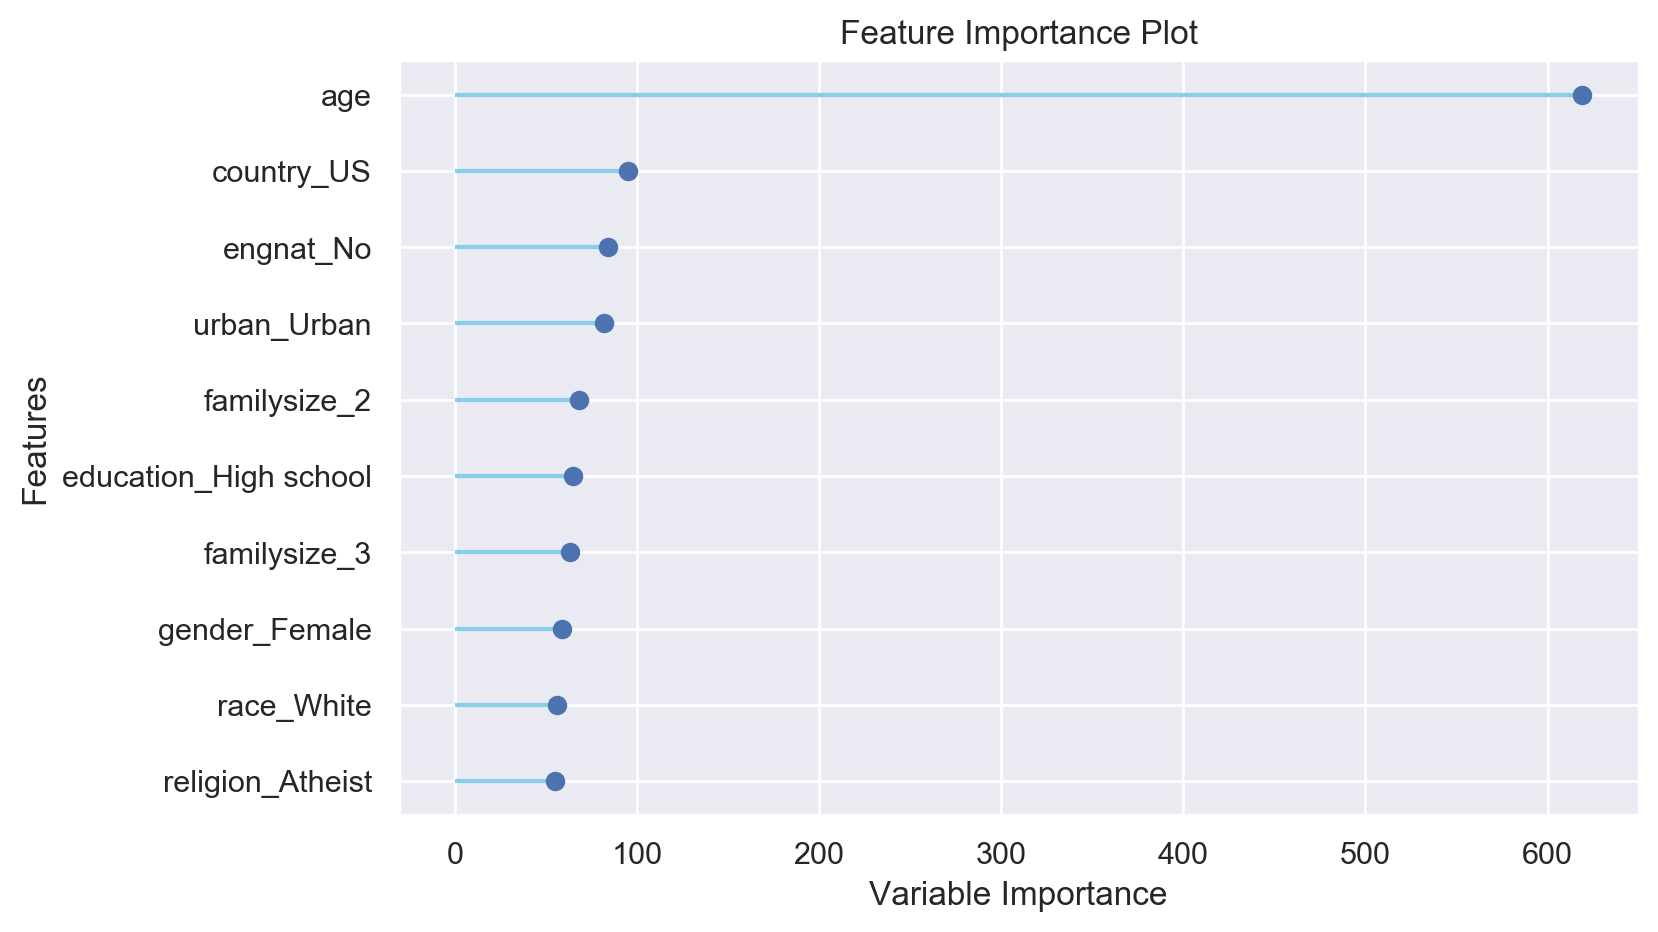

In [14]:
plot_model(estimator=lgbm, plot = "feature")

In [15]:
lgbm_cols = ["age", "country_US", "familysize_2", "race_White", "urban_Urban", "education_University degree", "engnat_No", "urban_Suburban", "religion_Atheist", "education_High school"]

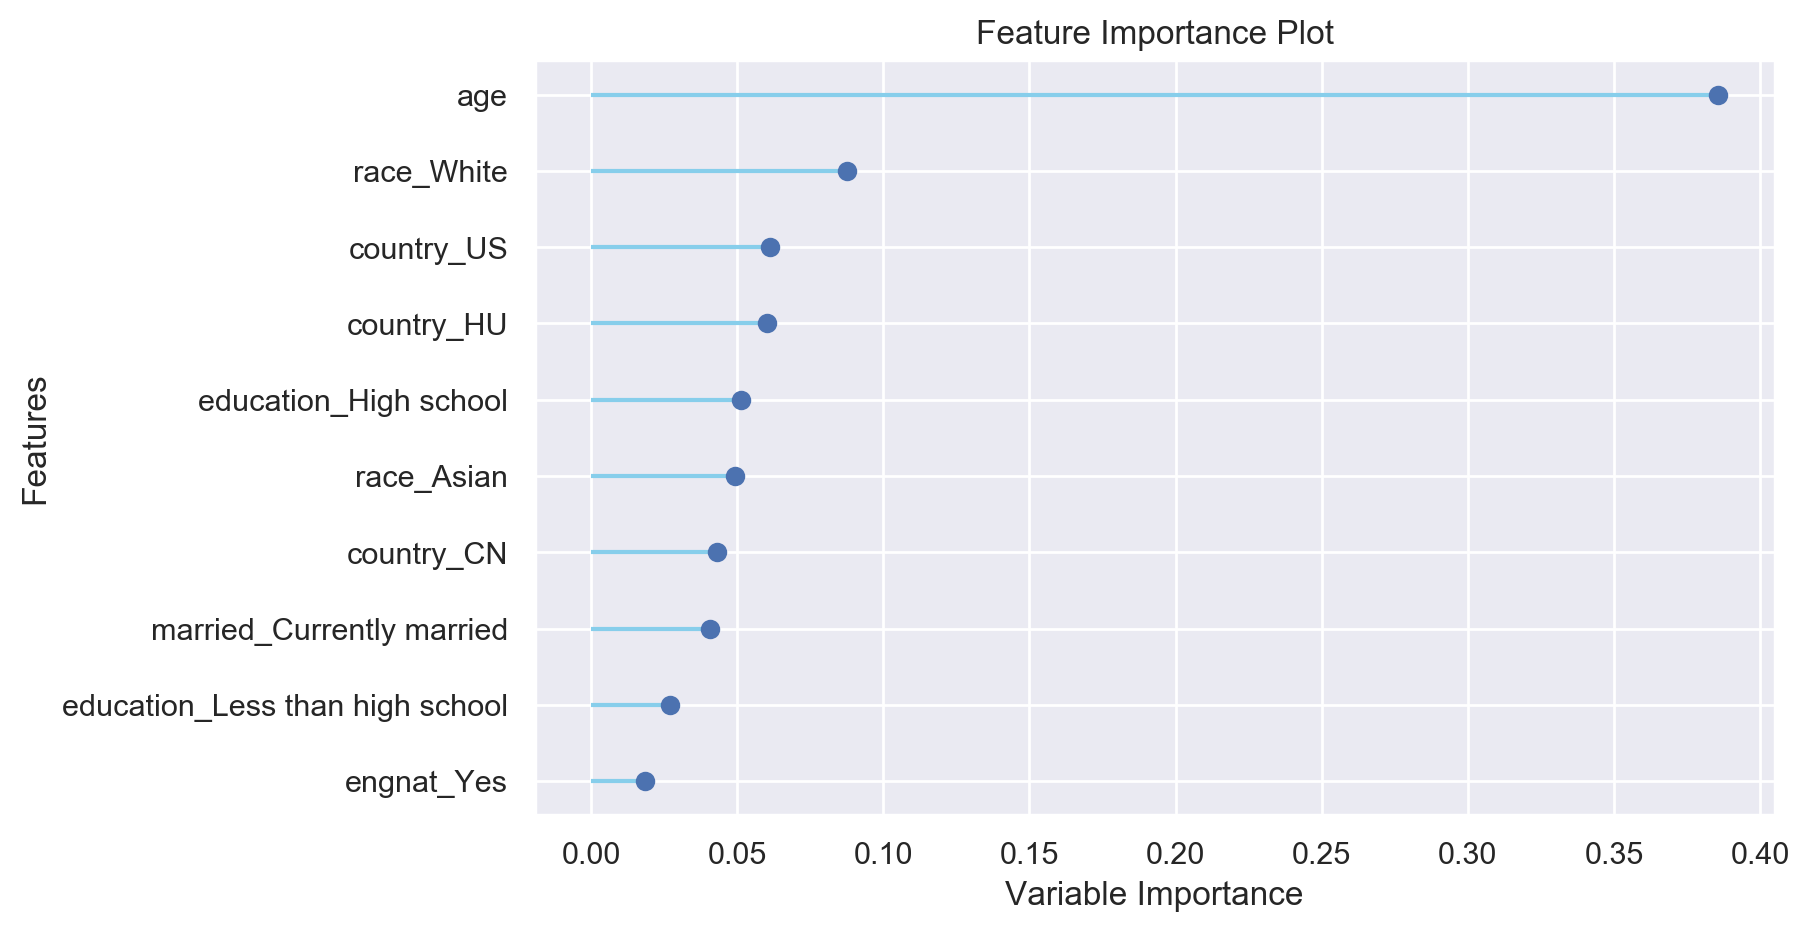

In [16]:
plot_model(estimator=gbc, plot = "feature")

In [17]:
gbc_cols = ["age", "race_White", "race_Asian", "country_CN", "coutry_HU", "married_Currently married", "country_US", "eductaion_High school", "country_CA", "education_Less than high school"]

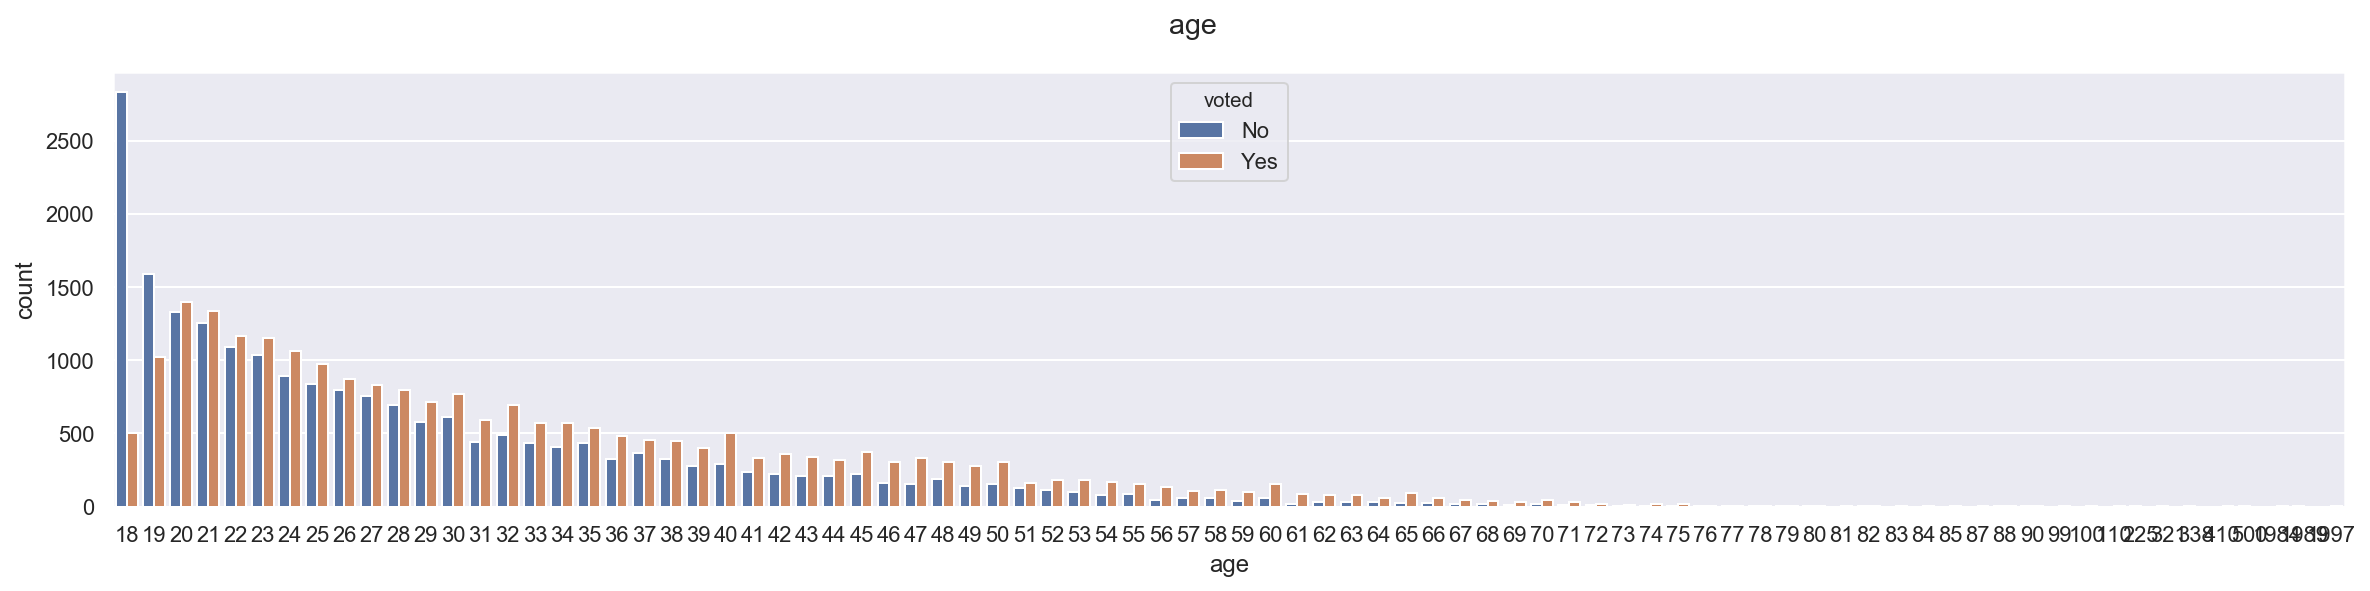

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)

fig.suptitle('age')


sns.countplot(df["age"], hue=df["voted"])


plt.show()

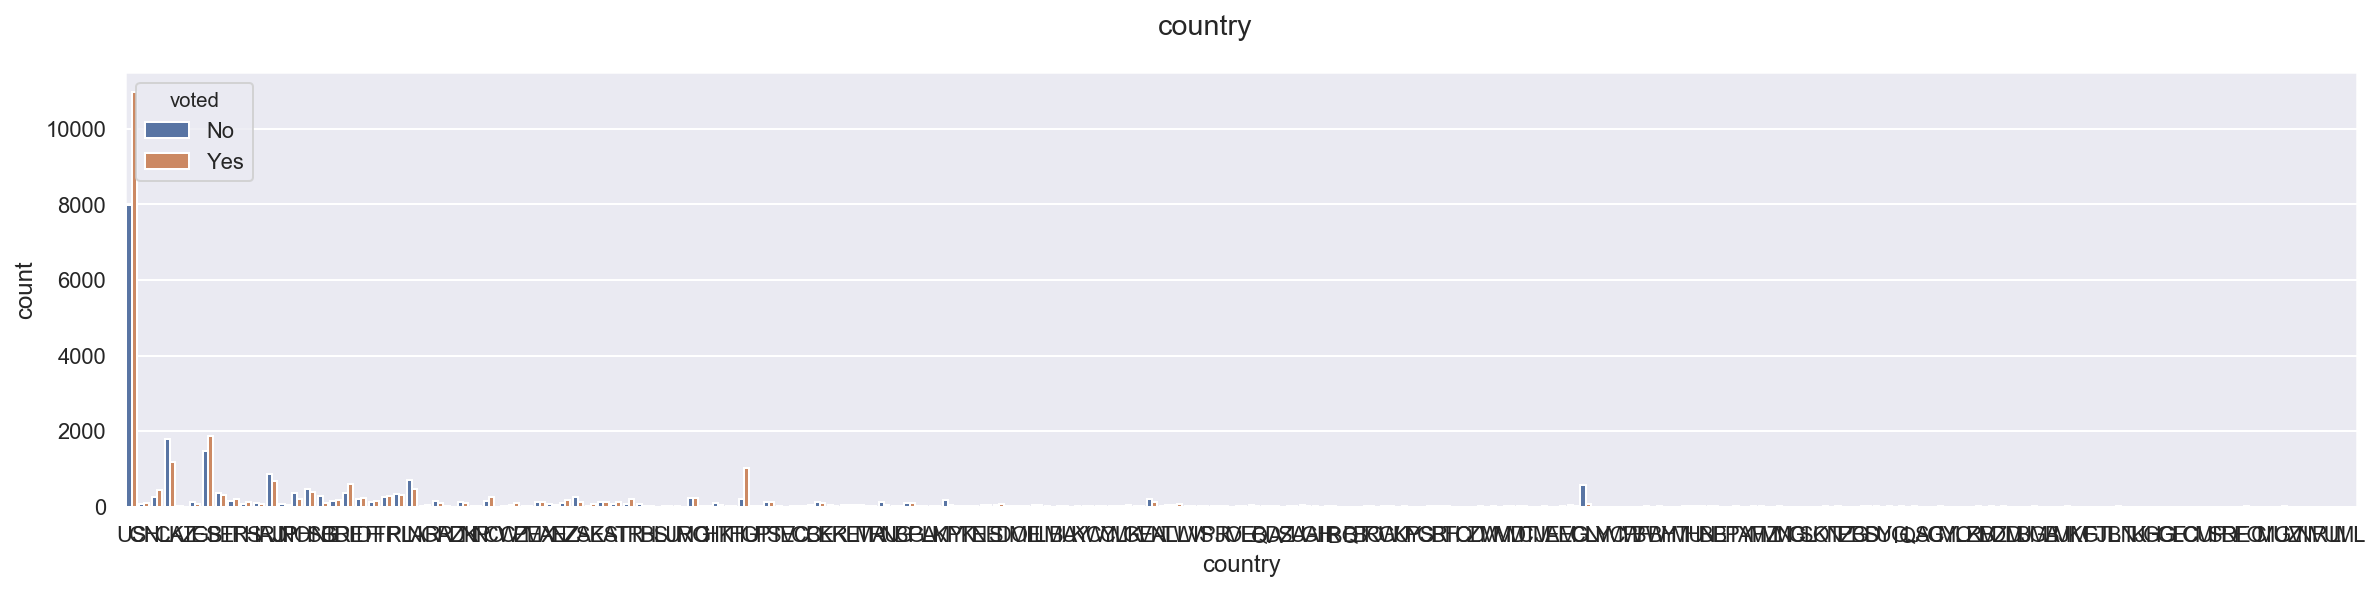

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)

fig.suptitle('country')


sns.countplot(df["country"], hue=df["voted"])


plt.show()

In [20]:
df_cntr = pd.DataFrame(df["country"].value_counts())

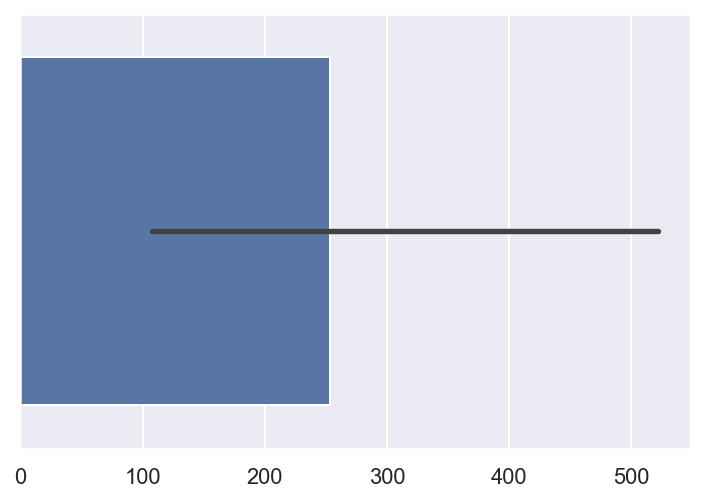

In [58]:
df_cntr
